<a href="https://colab.research.google.com/github/sooonsyk/ESAA/blob/main/Week13_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷**
###**규제 선형 모델의 개요**
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함
- 이전까지 선형 모델의 비용 함수는 RSS를 최소화하는, 즉 실제 값과 예측값의 차이를 최소화하는 것만 고려했음 - 그러다 보니 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커졌음 - 이럴 경우 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉬움
- 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야함
- 비용 함수 목표 = $Min(RSS(W) + alpha*||W||_2^2$ 최소화하는 W벡터 찾기
  - alpha : 학습 데이터 적합 정도오 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
    - alpha 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합 개선 가능
- L2 규제 : W의 제곱에 대해 페널티 부여하는 방식 - 릿지 회귀
- L1 규제 : W의 절댓값에 대해 페널티 부여하는 방식 - 라쏘 회귀 - 영향력이 크지 않은 회귀계수 값을 0으로 변환

###**릿지 회귀**

In [2]:
import pandas as pd
from sklearn.datasets import load_boston

#boston 데이터 세트 로드
boston = load_boston()

#boston 데이터 세트 데이터프레임 반환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

#boston 데이터 세트의 target배열은 주택 가격, 이름 PRICE 칼럼으로 Dataframe 에 추가
bostonDF['PRICE'] = boston.target


from sklearn.model_selection import train_test_split

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10 으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE : 5.518


- LinearRegression의 5.829 보다 좋은 성과

In [6]:
#릿지의 알파값의 0, 0.1, 1, 10, 100으로 변화시키면서

#릿지의 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

#alpha list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge = Ridge(alpha=alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1일 때 5 folds의 평균 RMSE : 5.788
alpha 1일 때 5 folds의 평균 RMSE : 5.653
alpha 10일 때 5 folds의 평균 RMSE : 5.518
alpha 100일 때 5 folds의 평균 RMSE : 5.330


- alpha 100일 때 가장 좋음

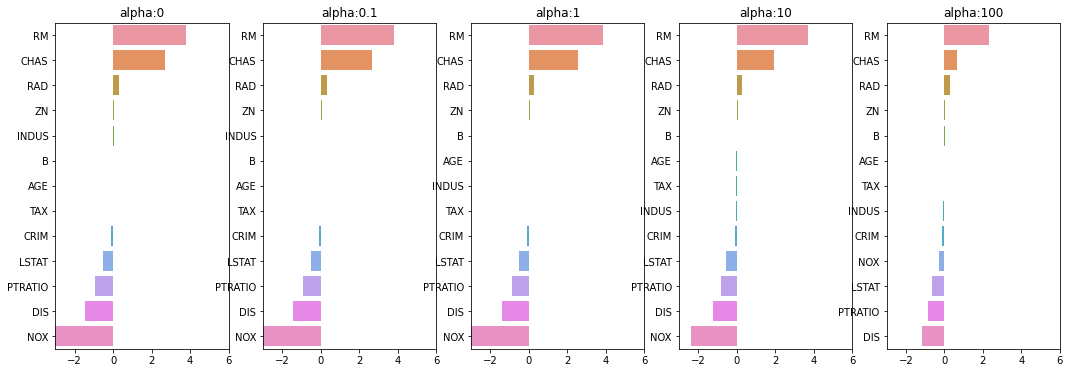

In [7]:
#alpha 값의 변화에 따른 피처의 회귀 계수 값 가로 막대 그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows = 1, ncols=5)
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos 는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff
  #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수 값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

#for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시

- alpha 값 증가시킬수록 회귀 계수 지속적으로 작아짐

In [9]:
#DataFrame에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


###**라쏘회귀**
- L1 규제 : $alpha*||W||_1$ , 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거

In [14]:
#인자로 회귀 모델의 이름, alpha 값들의 리스트, 피처 데이터 세트와 타깃 데이터 세트를 입력 받아서 alpha 값에 따른 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환

from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df = pd.DataFrame()
  if verbose: print('##### ', model_name, ' #####')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
    #cross_val_score 는 evaluation metric 만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)
    #알파에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    colname = 'alpha:'+str(param)
    coeff_df[colname] = coeff
  return coeff_df



In [15]:
#라쏘에 사용될 알파 파라미터의 값 정의 하고 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#####  Lasso  #####
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE : 6.189


- 0.07 일때 가장 좋음 , 릿지보다는 떨어지지만 선형회귀보다는 나은 수치

In [16]:
#반환된 coeff_lasso_df 를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 데이터프레임 출력
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


###**엘라스틱넷 회귀**
- L2, L1 결합한 회귀
- $RSS(W) + alpha2*||W||^2_2 + alpha1 * ||W||_1$ 식을 최소화하는 W 찾는 것이 엘라스틱넷 회귀 비용함수의 목표
- 오래 걸림
- l1_ratio 는 a/(a+b) - 0이면 L2 규제, 1이면 L1 규제

In [17]:
#엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
#l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data,y_target_n=y_target)


#####  ElasticNet  #####
alpha 0.07일 때 5폴드 세트의 평균 RMSE : 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE : 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE : 6.068


In [18]:
#반환된 coeff_elastic_df 를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 데이터프레임 출력
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


- alpha 0.5 가 가장 좋은 성능
- alpha 값에 따른 피처들의 회귀계수들 값이 라쏘보다는 상대적으로 0되는 값 적음

###**선형 회귀 모델을 위한 데이터 변환**
- 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업 수행하는 것이 일반적 - 무조건 예측 성능이 향상되는 것 아님, 일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됏을 경우에 이러한 변환 작업 수행
- 피처 데이터 세트에 적용하는 반환 작업
  1. StandardScaler 이용해 표준정규분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 이용해 최솟값 0, 최댓값 1인 값으로 정규화
  2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법, 1번 해보고 향상 없을 경우
  3. log함수 적용하다보면 정규 분포에 가까운 형태로 값이 분포됨 - 로그 변환
- 타깃값에는 일반적으로 로그 변환 적용

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

#method 인자로 변환 방법 결정, p_degree는 다항식 차수 입력 2 안 넘음
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

  return scaled_data

In [22]:
#Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 다른 RMSE 추출
alphas = [0.1, 1, 10, 100]

#5개 방식으로 변환, 먼저 원본 그대로, 표준정규분포, 표준정규 분포 + 다항식 특성
#최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None,None), ('Standard',None), ('Standard',2),('MinMax', None),('MinMax',2),('Log', None)]
for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print('\n## 변화 유형 : {0}, Polynomial Degree : {1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose=False)


## 변화 유형 : None, Polynomial Degree : None
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.788
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.653
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.518
alpha 100일 때 5폴드 세트의 평균 RMSE : 5.330

## 변화 유형 : Standard, Polynomial Degree : None
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.826
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.803
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.637
alpha 100일 때 5폴드 세트의 평균 RMSE : 5.421

## 변화 유형 : Standard, Polynomial Degree : 2
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 8.827
alpha 1일 때 5폴드 세트의 평균 RMSE : 6.871
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.485
alpha 100일 때 5폴드 세트의 평균 RMSE : 4.634

## 변화 유형 : MinMax, Polynomial Degree : None
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.764
alpha 1일 때 5폴드 세트의 평균 RMSE : 5.465
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.754
alpha 100일 때 5폴드 세트의 평균 RMSE : 7.635

## 변화 유형 : MinMax, Polynomial Degree : 2
alpha 0.1일 때 5폴드 세트의 평균 RMSE : 5.298
alpha 1일 때 5폴드 세트의 평균 RMSE : 4.323
alpha 10일 때 5폴드 세트의 평균 RMSE : 5.185
alpha 100일 때 5폴드 세트의 평균 RMSE : 6.538

## 변화 유형 : Log, Polynomial Degree : None
alpha 0.1일 때

##**로지스틱 회귀**
- 선형 회귀 방식을 분류에 적용
- 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류 결정
  - x값이 아무리 커지거나 작아져도 y값은 항상 0과 1 사이 값 반환

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardScaler로 평균이 0 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy : 0.977
roc_auc : 0.972


##**회귀 트리**
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것
- 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값 계산

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

#보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negatice MSE scores : ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

5 교차 검증의 개별 Negatice MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [5]:
#입력 모델과 데이터 세트를 입력 받아 교차 검증으로 평균 rmse 계산해주는 함수

def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#### ',model.__class__.__name__, ' ####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_esimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

####  DecisionTreeRegressor  ####
 5 교차 검증의 평균 RMSE : 5.978
####  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 4.423
####  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 4.269
[04:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:01:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
####  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 4.089
####  LGBMRegressor  ####
 5 교차 검증의 평균 RMSE : 4.571


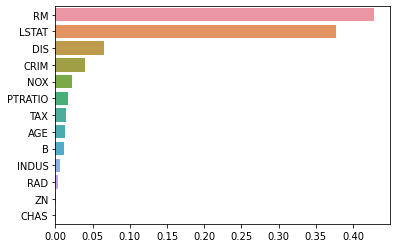

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

#앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


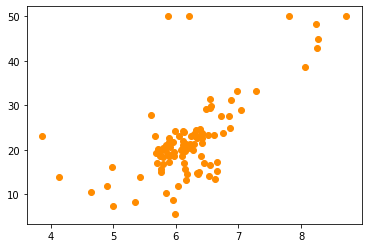

In [14]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressor 생성 DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

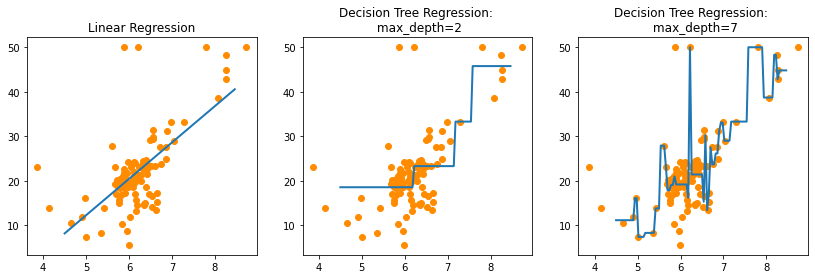

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

#X축 값을 4.5~8.5 로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
#선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

#DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

#DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

- 선형 회귀는 직선으로 예측 회귀선을 표현하는 데 반해, 회귀 트리의 경우 반할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만듬